In [1]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.callbacks import Callback,LearningRateScheduler, TensorBoard
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, accuracy_score, log_loss
import tensorflow as tf
from sklearn.utils import class_weight
import numpy as np
from kaggle.api.kaggle_api_extended import KaggleApi
from keras.optimizers import Adam
import seaborn as sns
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import os
import matplotlib.image as mpimg
import matplotlib.patches as patches
from ultralytics import YOLO
import cv2

2024-06-12 15:24:40.499429: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-12 15:24:40.687574: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
if tf.config.list_physical_devices('GPU'):
    print("GPU available.")
else:
    print("No GPU available, consider installing a compatible GPU version of TensorFlow.")

GPU available.


2024-06-12 15:24:47.429017: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-12 15:24:47.525150: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-12 15:24:47.525214: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [3]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# api = KaggleApi()
# api.authenticate()
# api.dataset_download_files('savanagrawal/detect-person-on-motorbike-or-scooter')

In [5]:
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./yolov8n.pt
./Model_Training.ipynb
./YOLOv3/yolov3_pb.cfg
./YOLOv3/yolov3-obj_final.weights
./YOLOv9/yolov9e.pt
./dataset/data.yaml
./dataset/labels/val.cache
./dataset/labels/train.cache
./dataset/labels/val/motorcyclists-standing-road-looks-each-other-11411588.txt
./dataset/labels/val/Laws-Large.txt
./dataset/labels/val/pcv-12258698__flip.txt
./dataset/labels/val/IMG_5915.txt
./dataset/labels/val/IMG_5900.txt
./dataset/labels/val/IMG_5901.txt
./dataset/labels/val/maxresdefault (1).txt
./dataset/labels/val/IMG_5911.txt
./dataset/labels/val/istockphoto-878994440-640x640.txt
./dataset/labels/val/maxresdefault (2)__flip.txt
./dataset/labels/val/maxresdefault (2).txt
./dataset/labels/val/IMG_5914.txt
./dataset/labels/val/mopeds-in-saigon-fe2e0596-56bb-4f63-91b1-790462069163__flip.txt
./dataset/labels/val/IMG_5913__flip.txt
./dataset/labels/val/motorcyclists-standing-road-looks-each-other-11411588__flip.txt
./dataset/labels/val/people-on-motorbikes-in-a-busy-road-ho-chi-minh-city-vietnam-

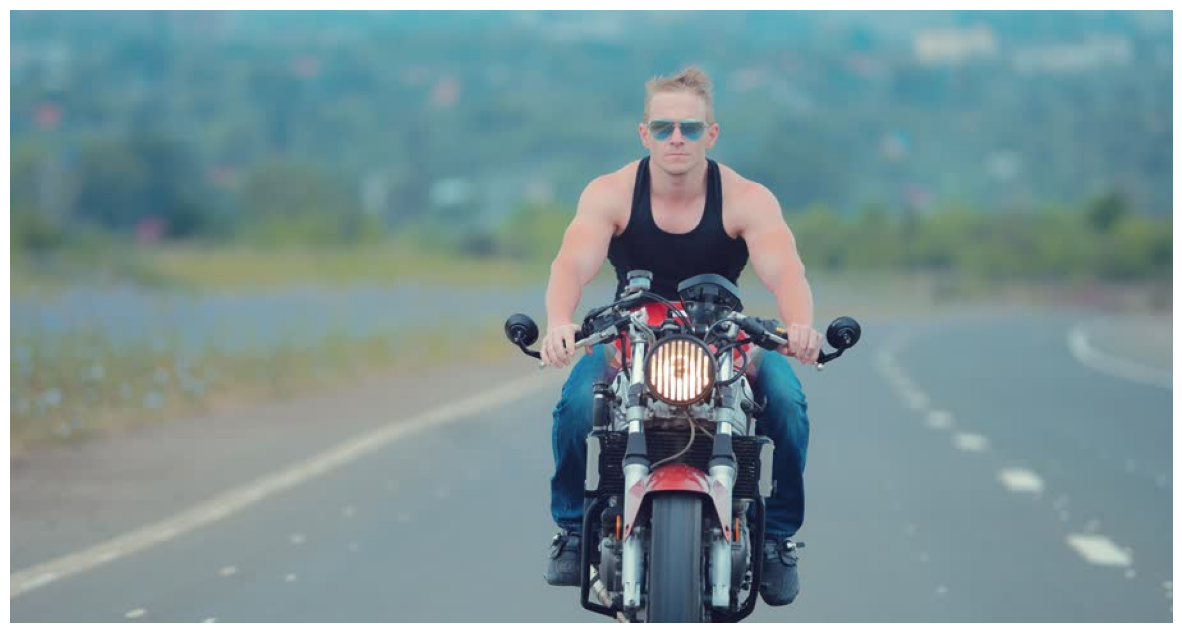

In [6]:
img0 = "./dataset/images/train/1 (1).jpg"
_ = plt.figure(figsize = (15,15))
_ = plt.axis('off')
_ = plt.imshow(mpimg.imread(img0))

In [7]:
# Build a YOLOv9c model from pretrained weight
model = YOLO("./YOLOv9/yolov9e.pt")

# Display model information (optional)
model.info()

YOLOv9e summary: 1225 layers, 58206592 parameters, 0 gradients, 193.0 GFLOPs


(1225, 58206592, 0, 193.01565439999996)

In [8]:
# values = pd.Series(os.listdir(directory)).apply(lambda x: os.path.splitext(x)[0]).tolist()

In [9]:
# unique_num = []
# for num in values:
#     if values.count(num) < 2:
#         unique_num.append(num)

In [10]:
# unique_num
# results = None
# gc.collect() # Python thing

NameError: name 'gc' is not defined

In [11]:
# Freeze all layers
for param in model.parameters():
    param.requires_grad = False

# Unfreeze the last layer
# Get the name of the last layer
last_layer_name = list(model.named_parameters())[-1][0]

for name, param in model.named_parameters():
    if last_layer_name in name:
        param.requires_grad = True

In [12]:
# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data="./dataset/data.yaml", epochs=100, imgsz=640)

Ultralytics YOLOv8.2.31 🚀 Python-3.11.8 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine/trainer: task=detect, mode=train, model=./YOLOv9/yolov9e.pt, data=./dataset/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: firas-ben-thayer (optivision). Use `wandb login --relogin` to force relogin


Freezing layer 'model.42.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


/home/firas_bt/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
train: Scanning /home/firas_bt/notebooks/Projects/Helmet detection/dataset/labels/train.cache... 706 images, 0 backgrounds, 0 corrupt: 100%|██████████| 706/706 [00:00<?, ?it/s]

train: WARNING ⚠️ /home/firas_bt/notebooks/Projects/Helmet detection/dataset/images/train/163.jpg: corrupt JPEG restored and saved



val: Scanning /home/firas_bt/notebooks/Projects/Helmet detection/dataset/labels/val.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]


Plotting labels to runs/detect/train10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 298 weight(decay=0.0), 310 weight(decay=0.0005), 309 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train10
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/45 [00:12<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 1.17 GiB. GPU 

In [ ]:
from numba import cuda 
device = cuda.get_current_device()
device.reset()

CudaSupportError: Error at driver init: Call to cuInit results in CUDA_ERROR_NO_DEVICE (100)